In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/National_extract_V1_2_2.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31032 entries, 0 to 31031
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   adm_0_name                    31032 non-null  object 
 1   adm_1_name                    0 non-null      float64
 2   adm_2_name                    0 non-null      float64
 3   full_name                     31032 non-null  object 
 4   ISO_A0                        31032 non-null  object 
 5   FAO_GAUL_code                 31032 non-null  int64  
 6   RNE_iso_code                  31032 non-null  object 
 7   IBGE_code                     0 non-null      float64
 8   calendar_start_date           31032 non-null  object 
 9   calendar_end_date             31032 non-null  object 
 10  Year                          31032 non-null  int64  
 11  dengue_total                  31032 non-null  float64
 12  case_definition_standardised  31032 non-null  object 
 13  S

# Tiền xử lí dữ liệu

In [ ]:
# Xóa các cột có toàn bộ giá trị null
cols_to_drop = ['adm_1_name', 'adm_2_name', 'IBGE_code']
df = df.drop(columns=cols_to_drop)

# Kiểm tra lại
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31032 entries, 0 to 31031
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   adm_0_name                    31032 non-null  object 
 1   full_name                     31032 non-null  object 
 2   ISO_A0                        31032 non-null  object 
 3   FAO_GAUL_code                 31032 non-null  int64  
 4   RNE_iso_code                  31032 non-null  object 
 5   calendar_start_date           31032 non-null  object 
 6   calendar_end_date             31032 non-null  object 
 7   Year                          31032 non-null  int64  
 8   dengue_total                  31032 non-null  float64
 9   case_definition_standardised  31032 non-null  object 
 10  S_res                         31032 non-null  object 
 11  T_res                         31032 non-null  object 
 12  UUID                          31032 non-null  object 
dtypes

In [ ]:
# Chuyển đổi cột ngày tháng sang kiểu datetime
df['calendar_start_date'] = pd.to_datetime(df['calendar_start_date'], errors='coerce')
df['calendar_end_date'] = pd.to_datetime(df['calendar_end_date'], errors='coerce')

# Kiểm tra lại kiểu dữ liệu
print(df.dtypes)

adm_0_name                              object
full_name                               object
ISO_A0                                  object
FAO_GAUL_code                            int64
RNE_iso_code                            object
calendar_start_date             datetime64[ns]
calendar_end_date               datetime64[ns]
Year                                     int64
dengue_total                           float64
case_definition_standardised            object
S_res                                   object
T_res                                   object
UUID                                    object
dtype: object


In [ ]:
# Tạo cột Month
df['Month'] = df['calendar_start_date'].dt.month

# Tạo hàm xác định mùa
def get_season(month):
    if month in [12, 1, 2]:
        return 'Autumn'   # Mùa đông
    elif month in [3, 4, 5]:
        return 'Summer'   # Mùa xuân
    elif month in [6, 7, 8]:
        return 'Spring'   # Mùa hè
    elif month in [9, 10, 11]:
        return 'Winter'   # Mùa thu
    else:
        return 'Unknown'  # Dành cho giá trị bị thiếu

# Áp dụng hàm vào cột Month để tạo Season
df['Season'] = df['Month'].apply(get_season)

# Kiểm tra nhanh
print(df[['calendar_start_date', 'Month', 'Season']].head())

  calendar_start_date  Month  Season
0          2021-01-03      1  Autumn
1          2021-01-10      1  Autumn
2          2021-01-17      1  Autumn
3          2021-01-24      1  Autumn
4          2021-01-31      1  Autumn


In [ ]:
# Tổng số ca bệnh theo mùa
season_cases = df.groupby('Season')['dengue_total'].transform('sum')
df['Total_cases_by_season'] = season_cases

# Tổng số ca bệnh theo tháng
month_cases = df.groupby('Month')['dengue_total'].transform('sum')
df['Total_cases_by_month'] = month_cases

# Kiểm tra nhanh
print(df[['calendar_start_date', 'Month', 'Season', 'dengue_total', 'Total_cases_by_season', 'Total_cases_by_month']].head())

  calendar_start_date  Month  Season  dengue_total  Total_cases_by_season  \
0          2021-01-03      1  Autumn         101.0             36306996.0   
1          2021-01-10      1  Autumn         151.0             36306996.0   
2          2021-01-17      1  Autumn         201.0             36306996.0   
3          2021-01-24      1  Autumn         202.0             36306996.0   
4          2021-01-31      1  Autumn         100.0             36306996.0   

   Total_cases_by_month  
0            32450143.0  
1            32450143.0  
2            32450143.0  
3            32450143.0  
4            32450143.0  


In [ ]:
df.describe()

,FAO_GAUL_code,calendar_start_date,calendar_end_date,Year,dengue_total,Month,Total_cases_by_season,Total_cases_by_month
count,3.103200e+04,31032,31032,31032.000000,3.103200e+04,31032.000000,3.103200e+04,3.103200e+04
mean,6.207700e+04,2015-05-31 19:30:59.860788736,2015-07-09 05:49:25.197215744,2014.958333,1.830701e+03,6.065191,1.595480e+07,7.146870e+06
min,5.000000e+00,1924-01-20 00:00:00,1924-01-26 00:00:00,1924.000000,0.000000e+00,1.000000,4.845437e+06,1.202485e+06
25%,7.100000e+01,2014-05-11 00:00:00,2014-05-22 06:00:00,2014.000000,0.000000e+00,3.000000,5.651518e+06,1.696447e+06
50%,1.580000e+02,2017-12-01 00:00:00,2017-12-09 00:00:00,2017.000000,4.200000e+01,6.000000,1.000636e+07,1.983187e+06
75%,2.220000e+02,2020-04-05 00:00:00,2020-04-12 00:00:00,2020.000000,3.970000e+02,9.000000,3.630700e+07,3.469972e+06
max,1.013696e+06,2023-09-01 00:00:00,2023-09-30 00:00:00,2023.000000,1.473645e+06,12.000000,3.630700e+07,3.245014e+07
std,2.416782e+05,NaN,NaN,8.449577,1.735139e+04,3.640623,1.373813e+07,1.119528e+07


# Khám phá dữ liệu

In [ ]:
# Tổng ca bệnh toàn thế giới
total_world = df['dengue_total'].sum()
print(f"Tổng số ca sốt xuất huyết toàn thế giới: {total_world:.0f}")

Tổng số ca sốt xuất huyết toàn thế giới: 56810306


In [ ]:
# Tạo bản đồ ánh xạ từ mã quốc gia sang châu lục
continent_mapping = {
    'AFR': 'Africa',
    'ASI': 'Asia',
    'EUR': 'Europe',
    'NAM': 'North America',
    'SAM': 'South America',
    'OCN': 'Oceania',
    # Hoặc cụ thể hơn theo tên quốc gia:
    'BRA': 'South America', # Brazil
    'VNM': 'Asia',          # Vietnam
    'THA': 'Asia',          # Thailand
    'PHL': 'Asia',          # Philippines
    'IDN': 'Asia',          # Indonesia
    # ... bạn có thể thêm tiếp nếu dataset có thêm nước khác
}

# Thêm cột châu lục
df['Continent'] = df['ISO_A0'].map(continent_mapping)

In [ ]:
# Tổng số ca theo châu lục
total_by_continent = df.groupby('Continent')['dengue_total'].sum()

print("Tổng số ca sốt xuất huyết theo từng châu lục:")
print(total_by_continent)

Tổng số ca sốt xuất huyết theo từng châu lục:
Continent
Asia             14324668.0
South America    21988989.0
Name: dengue_total, dtype: float64


In [ ]:
# Tổng số ca bệnh tại Việt Nam
total_vietnam = df[df['adm_0_name'] == 'VIET NAM']['dengue_total'].sum()
print(f"Tổng số ca sốt xuất huyết tại Việt Nam: {total_vietnam:.0f}")

Tổng số ca sốt xuất huyết tại Việt Nam: 4501900


<ipython-input-17-d63343d6e390>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_countries, x='dengue_total', y='adm_0_name', palette='Reds_r')


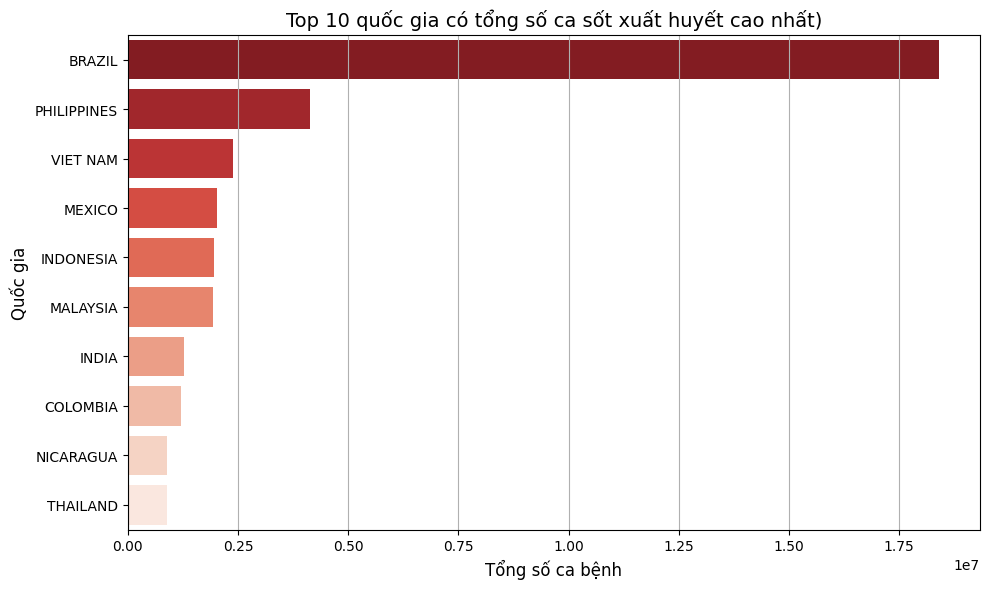

In [ ]:
# Bước 1: Lọc dữ liệu từ năm 2005
df_filtered = df[(df['Year'] >= 2005)]

# Bước 2: Nhóm theo quốc gia và tính tổng số ca
country_total = df_filtered.groupby('adm_0_name')['dengue_total'].sum()

# Bước 3: Lấy Top 10 quốc gia có tổng số ca lớn nhất
top10_countries = country_total.sort_values(ascending=False).head(10).reset_index()

# Bước 4: Vẽ biểu đồ
plt.figure(figsize=(10,6))
sns.barplot(data=top10_countries, x='dengue_total', y='adm_0_name', palette='Reds_r')
plt.title('Top 10 quốc gia có tổng số ca sốt xuất huyết cao nhất)', fontsize=14)
plt.xlabel('Tổng số ca bệnh', fontsize=12)
plt.ylabel('Quốc gia', fontsize=12)
plt.grid(axis='x')
plt.tight_layout()
plt.show()


Nhận xét biểu đồ: Top 10 quốc gia có tổng số ca sốt xuất huyết cao nhất
1. Brazil dẫn đầu
Brazil là quốc gia có tổng số ca sốt xuất huyết cao nhất kể từ năm 2005 (trong các bản ghi hợp lệ).

Điều này phản ánh tình hình dịch bệnh nghiêm trọng, có thể do khí hậu nhiệt đới và điều kiện môi trường thuận lợi cho muỗi truyền bệnh.

2. Việt Nam đứng thứ 3
Việt Nam nằm trong nhóm 10 nước có tổng ca bệnh cao, cho thấy dịch sốt xuất huyết là vấn đề nghiêm trọng tại đất nước chúng ta.

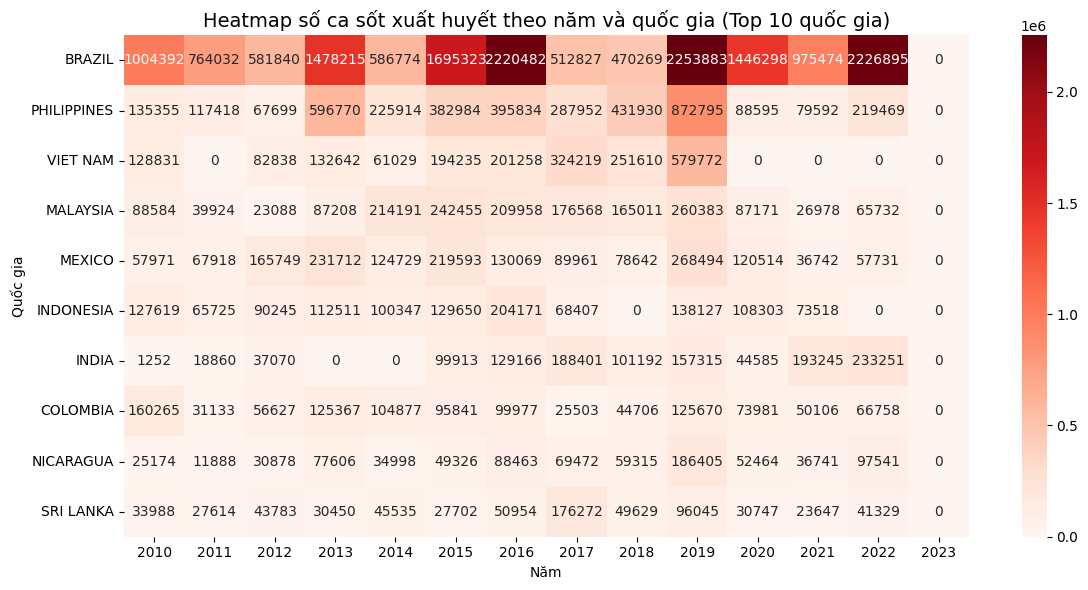

In [ ]:
# Bước 1: Lọc dữ liệu từ năm 2005
df_filtered = df[(df['Year'] >= 2010)]

# Bước 2: Tạo bảng tổng hợp (pivot table) tổng số ca bệnh theo quốc gia và năm
pivot_table = df_filtered.pivot_table(values='dengue_total',
                                      index='adm_0_name',
                                      columns='Year',
                                      aggfunc='sum',
                                      fill_value=0)

# Bước 3: Chỉ lấy top 10 quốc gia có tổng số ca nhiều nhất để biểu đồ dễ đọc
top_countries = pivot_table.sum(axis=1).sort_values(ascending=False).head(10).index
pivot_top = pivot_table.loc[top_countries]

# Bước 4: Vẽ heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_top, annot=True, fmt=".0f", cmap='Reds')
plt.title('Heatmap số ca sốt xuất huyết theo năm và quốc gia (Top 10 quốc gia)', fontsize=14)
plt.xlabel('Năm')
plt.ylabel('Quốc gia')
plt.tight_layout()
plt.show()


Biểu đồ heatmap cho thấy sự thay đổi số liệu qua các năm (từ 2010 đến 2023) đối với 10 quốc gia, với Việt Nam nổi bật:

Việt Nam (VIET NAM) có giá trị tăng mạnh từ 2018 (24219) và đạt đỉnh 57972 vào 2020, sau đó giảm dần nhưng vẫn duy trì mức cao.
Philippines và Brazil có xu hướng tăng đều qua các năm, với Philippines đạt 219469 vào 2023 và Brazil đạt 225383 vào cùng năm.
Malaysia và Mexico cũng tăng đáng kể, đặc biệt từ 2018-2020.
Indonesia và Ấn Độ có sự biến động, với giá trị cao nhất lần lượt là 73518 (2021) và 233251 (2022), nhưng sau đó giảm.
Các quốc gia như Colombia, Nicaragua, và Sri Lanka có giá trị thấp hơn và ít biến động.

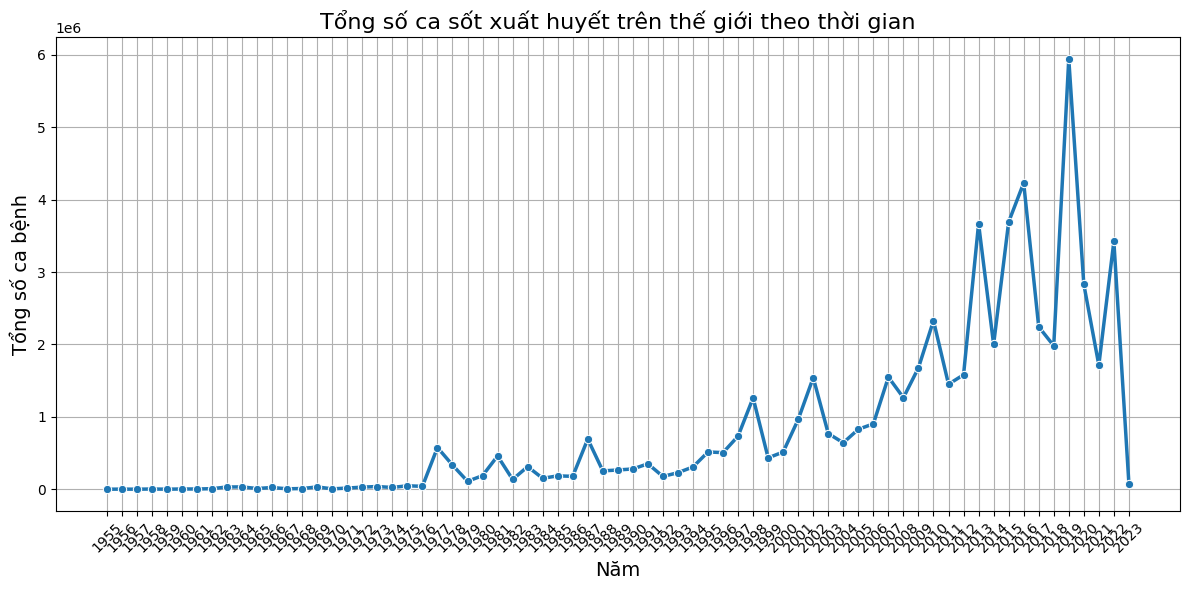

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Nhóm dữ liệu theo năm và tính tổng số ca bệnh
dengue_by_year = df.groupby('Year')['dengue_total'].sum().reset_index()

# Loại bỏ các năm không mong muốn (1924 và 1925)
dengue_by_year = dengue_by_year[~dengue_by_year['Year'].isin([1924, 1925])]

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.lineplot(data=dengue_by_year, x='Year', y='dengue_total', marker='o', linewidth=2.5)

plt.title('Tổng số ca sốt xuất huyết trên thế giới theo thời gian', fontsize=16)
plt.xlabel('Năm', fontsize=14)
plt.ylabel('Tổng số ca bệnh', fontsize=14)
plt.grid(True)
plt.xticks(dengue_by_year['Year'], rotation=45)
plt.tight_layout()
plt.show()



Biểu đồ cho thấy tổng số ca sốt xuất huyết toàn cầu tăng đều theo thời gian, đặc biệt từ thập niên 1990 trở đi.

Các đỉnh dịch lớn:

Khoảng 2019: Đỉnh cao nhất gần 6 triệu ca bệnh.

Có tính dao động giữa các năm, nhưng xu hướng chính vẫn là gia tăng mạnh mẽ.

Cảnh báo toàn cầu:
Điều này phản ánh mức độ nghiêm trọng ngày càng tăng của sốt xuất huyết trên toàn thế giới — có thể liên quan đến biến đổi khí hậu, đô thị hóa, và sự lây lan của muỗi truyền bệnh.

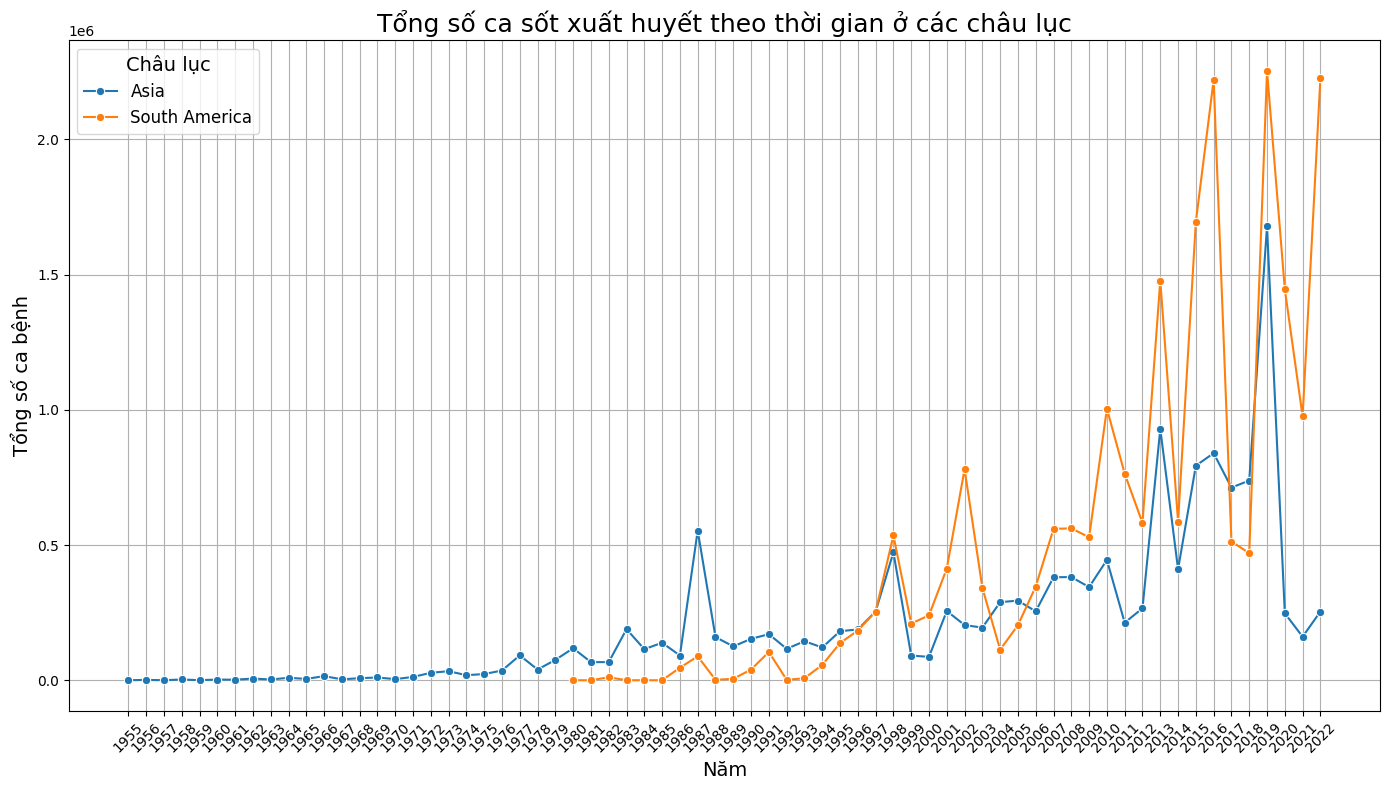

In [ ]:
# Group dữ liệu theo Continent và Year
continent_dengue_by_year = df.groupby(['Continent', 'Year'])['dengue_total'].sum().reset_index()

# Loại bỏ năm 1924 và 1925
continent_dengue_by_year = continent_dengue_by_year[~continent_dengue_by_year['Year'].isin([1924, 1925])]

# Vẽ biểu đồ
plt.figure(figsize=(14, 8))

# Dùng seaborn để vẽ nhiều đường theo từng châu lục
sns.lineplot(
    data=continent_dengue_by_year,
    x='Year', y='dengue_total',
    hue='Continent',
    marker='o'
)

plt.title('Tổng số ca sốt xuất huyết theo thời gian ở các châu lục', fontsize=18)
plt.xlabel('Năm', fontsize=14)
plt.ylabel('Tổng số ca bệnh', fontsize=14)
plt.legend(title='Châu lục', fontsize=12, title_fontsize=14)
plt.grid(True)
plt.xticks(sorted(continent_dengue_by_year['Year'].unique()), rotation=45)
plt.tight_layout()
plt.show()


So sánh châu Á và Nam Mỹ:

Trước năm 2000: Châu Á ghi nhận nhiều ca sốt xuất huyết hơn Nam Mỹ.

Sau năm 2000: Nam Mỹ bùng nổ mạnh mẽ, có năm vượt hơn 2 triệu ca, vượt xa châu Á.

Hai khu vực đều có xu hướng tăng, nhưng Nam Mỹ có biến động lớn hơn, biểu hiện qua các đỉnh nhọn cao.

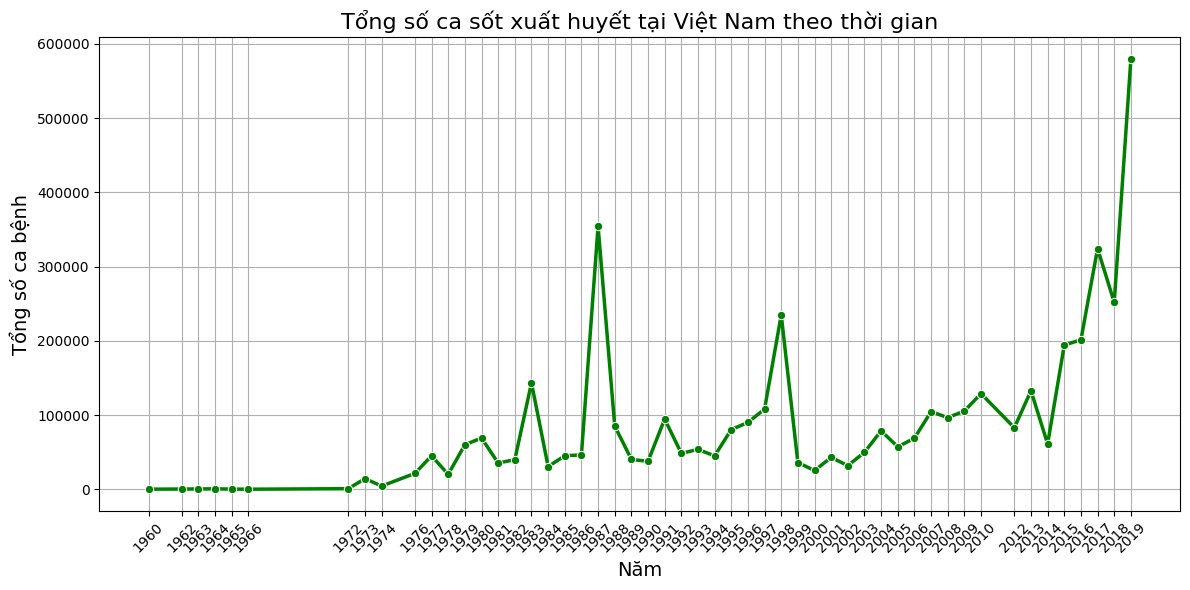

In [ ]:
# Lọc dữ liệu riêng cho Việt Nam
vietnam_df = df[df['adm_0_name'] == 'VIET NAM']

# Nhóm dữ liệu theo năm và tính tổng số ca bệnh
vietnam_dengue_by_year = vietnam_df.groupby('Year')['dengue_total'].sum().reset_index()

# Vẽ biểu đồ
plt.figure(figsize=(12,6))
sns.lineplot(data=vietnam_dengue_by_year, x='Year', y='dengue_total', marker='o', linewidth=2.5, color='green')

plt.title('Tổng số ca sốt xuất huyết tại Việt Nam theo thời gian', fontsize=16)
plt.xlabel('Năm', fontsize=14)
plt.ylabel('Tổng số ca bệnh', fontsize=14)
plt.grid(True)
plt.xticks(vietnam_dengue_by_year['Year'], rotation=45)
plt.tight_layout()
plt.show()

Biểu đồ thể hiện tổng số ca sốt xuất huyết tại Việt Nam theo thời gian (từ khoảng 1960 đến 2019)
1. Xu hướng tổng thể:
Số ca bệnh có xu hướng tăng dần theo thời gian, đặc biệt từ khoảng năm 2000 trở đi.

Trước năm 1974, gần như không có dữ liệu hoặc số ca bệnh rất thấp (gần 0).

2. Các đỉnh dịch lớn:
Có một số năm đột biến về số ca bệnh:

1987: Ghi nhận khoảng 350.000 ca — là một đỉnh dịch lớn đầu tiên.

1998: Lại có đỉnh khoảng 230.000 ca.

2017–2019: Giai đoạn cuối biểu đồ cho thấy gia tăng đột biến, đặc biệt năm 2019 vượt 580.000 ca, là mức cao nhất trong lịch sử được ghi lại.

<ipython-input-22-510e1bd14112>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dengue_by_season_vn, x='Season', y='dengue_total', order=season_order, palette='Set2')


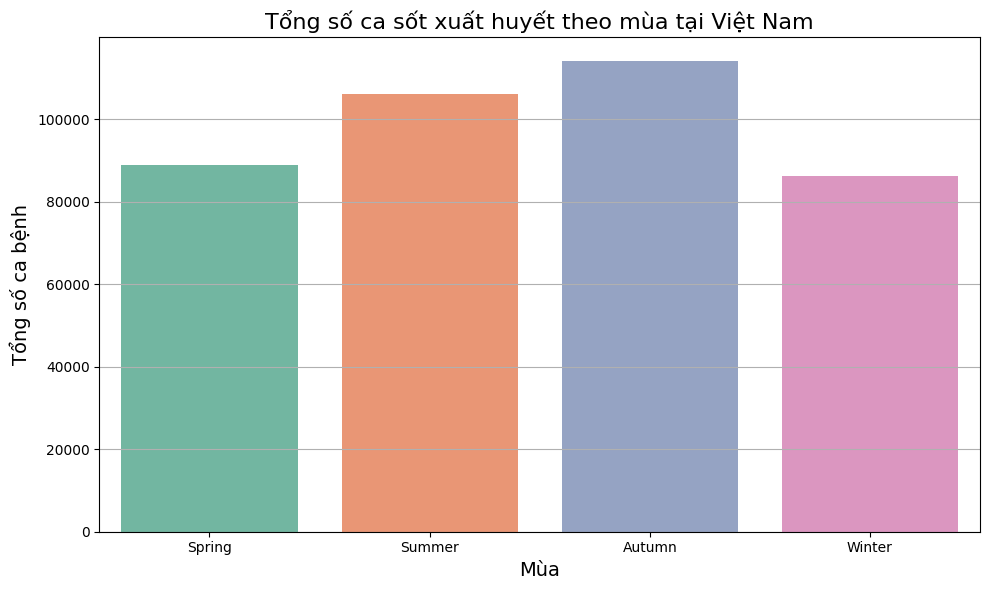

In [ ]:
# Lọc dữ liệu cho Việt Nam
vietnam_df = df[df['adm_0_name'] == 'VIET NAM']
# Bước 2: Giữ lại dữ liệu từ năm 2005 trở đi
vietnam_recent = vietnam_df[vietnam_df['Year'] >= 2005]

# Bước 3: Loại bỏ các dòng có số ca bệnh > 4000
vietnam_recent = vietnam_recent[vietnam_recent['dengue_total'] <= 4000]

# Bước 4: Loại bỏ các năm chỉ có 1 dòng
year_counts = vietnam_recent['Year'].value_counts()
valid_years = year_counts[year_counts > 1].index
vietnam_valid = vietnam_recent[vietnam_recent['Year'].isin(valid_years)]
# Nhóm theo mùa và tính tổng số ca bệnh
dengue_by_season_vn = vietnam_valid.groupby('Season')['dengue_total'].sum().reset_index()

# Sắp xếp mùa theo thứ tự hợp lý
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']

# Vẽ biểu đồ cột
plt.figure(figsize=(10,6))
sns.barplot(data=dengue_by_season_vn, x='Season', y='dengue_total', order=season_order, palette='Set2')

plt.title('Tổng số ca sốt xuất huyết theo mùa tại Việt Nam', fontsize=16)
plt.xlabel('Mùa', fontsize=14)
plt.ylabel('Tổng số ca bệnh', fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


1. Mùa có nhiều ca bệnh nhất:
Mùa Thu ghi nhận tổng số ca bệnh cao nhất.

Ngay sau đó là mùa Hè, cũng có số ca bệnh rất cao, gần tương đương mùa Thu.

2. Mùa có ít ca bệnh hơn:
Mùa Xuân và mùa Đông có số ca bệnh thấp hơn đáng kể.

Mùa Đông là mùa có tổng số ca bệnh thấp nhất.



<ipython-input-23-65d4d264e006>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=newdengue, x='Season', y='dengue_total', order=season_order, palette='pastel')


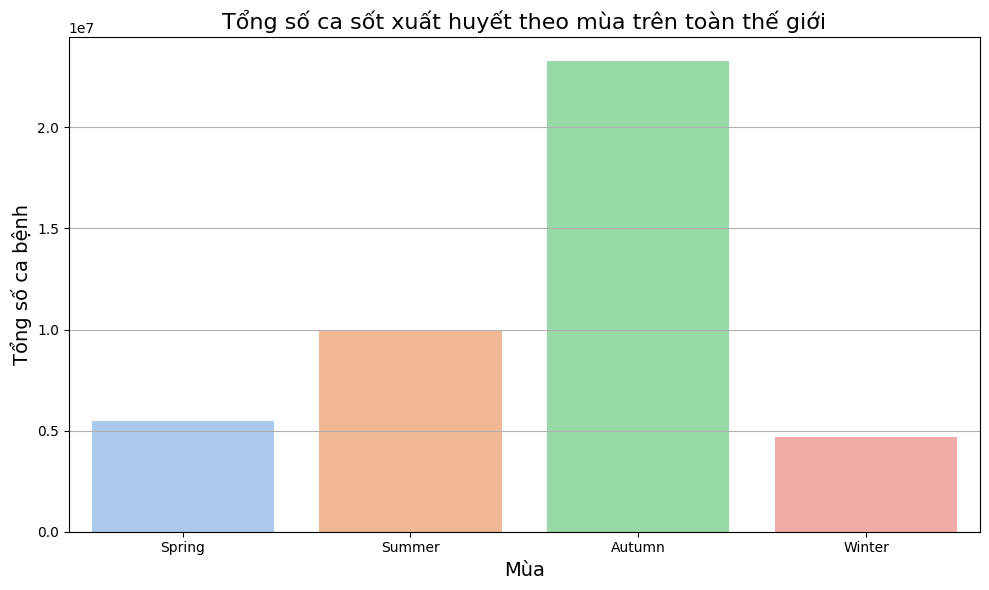

In [ ]:
# Nhóm theo mùa và tính tổng số ca bệnh toàn thế giới
dengue_by_season_world = df.groupby('Season')['dengue_total'].sum().reset_index()
# Filter data from original dataframe (df) based on year, then group by season
newdengue = df[df['Year'] >= 2005].groupby('Season')['dengue_total'].sum().reset_index()
# Sắp xếp mùa
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']

# Vẽ biểu đồ
plt.figure(figsize=(10,6))
sns.barplot(data=newdengue, x='Season', y='dengue_total', order=season_order, palette='pastel')

plt.title('Tổng số ca sốt xuất huyết theo mùa trên toàn thế giới', fontsize=16)
plt.xlabel('Mùa', fontsize=14)
plt.ylabel('Tổng số ca bệnh', fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

1. Mùa có số ca bệnh cao nhất:
Mùa Thu (Autumn) chiếm số ca bệnh cao nhất, vượt trội so với các mùa còn lại, trên 22 triệu ca.

 2. Mùa có số ca bệnh thấp nhất:
Mùa Đông (Winter) có tổng số ca thấp nhất, dưới 5 triệu ca.

 3. Các mùa còn lại:
Mùa Hè (Summer) có số ca bệnh cao thứ hai, khoảng 10 triệu ca.

Mùa Xuân (Spring) có số ca bệnh thấp hơn Hè, khoảng 6 triệu ca.

 Tổng kết xu hướng toàn cầu:
Sốt xuất huyết bùng phát mạnh vào mùa Thu, tiếp theo là mùa Hè, trên phạm vi toàn thế giới.

Điều này cho thấy tính mùa vụ toàn cầu của dịch sốt xuất huyết, phần lớn có thể liên quan đến khí hậu nhiệt đới - cận nhiệt đới nơi mà mùa Thu vẫn còn đủ nóng ẩm cho muỗi phát triển.

 So sánh với Việt Nam:
Xu hướng tương tự nhau: Mùa Thu và Hè là 2 mùa có số ca cao nhất.

Điều này cho thấy Việt Nam cũng theo sát xu hướng toàn cầu, nhiều khả năng do điều kiện khí hậu tương đồng với các khu vực có dịch mạnh như Đông Nam Á và Nam Mỹ.

<ipython-input-24-7f99b9a6d3ac>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Season', y='dengue_total', order=season_order, ax=axes[i], palette='muted')
<ipython-input-24-7f99b9a6d3ac>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Season', y='dengue_total', order=season_order, ax=axes[i], palette='muted')


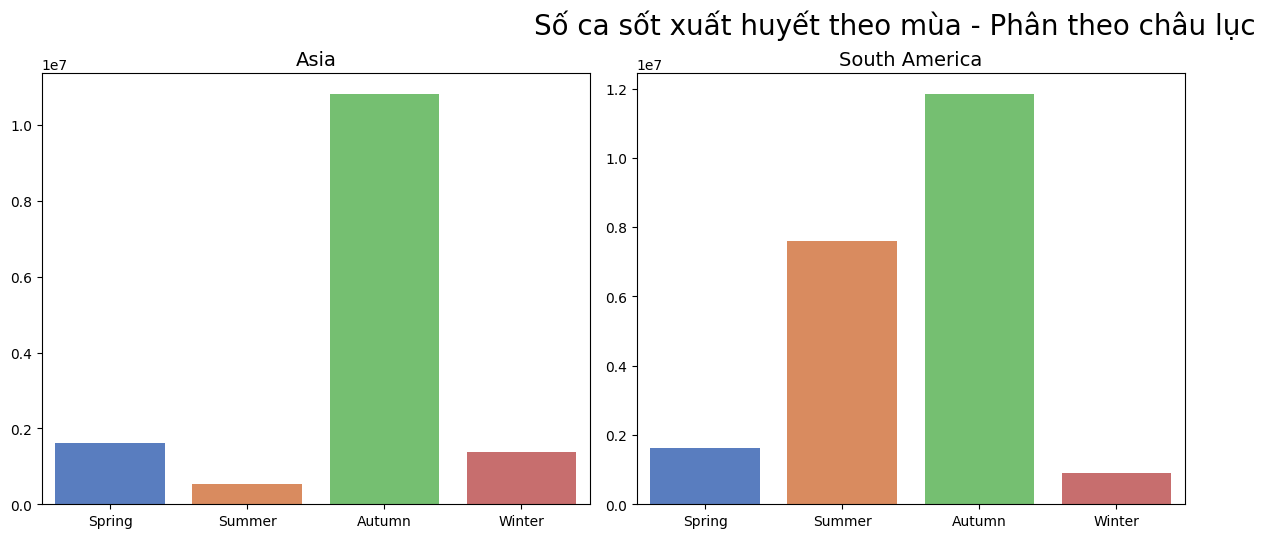

In [ ]:
# Nhóm lại dữ liệu
continent_season = df.groupby(['Continent', 'Season'])['dengue_total'].sum().reset_index()

# Danh sách các châu lục có trong dữ liệu
continents = continent_season['Continent'].unique()

# Set up Subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 hàng, 3 cột
axes = axes.flatten()

season_order = ['Spring', 'Summer', 'Autumn', 'Winter']

# Vẽ từng châu lục
for i, continent in enumerate(continents):
    data = continent_season[continent_season['Continent'] == continent]
    sns.barplot(data=data, x='Season', y='dengue_total', order=season_order, ax=axes[i], palette='muted')
    axes[i].set_title(f'{continent}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Bỏ các ô trống (nếu có)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Số ca sốt xuất huyết theo mùa - Phân theo châu lục', fontsize=20)
plt.tight_layout()
plt.show()


<ipython-input-25-7a34754e9d62>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vietnam_monthly, x='Month', y='dengue_total', palette='YlOrRd')


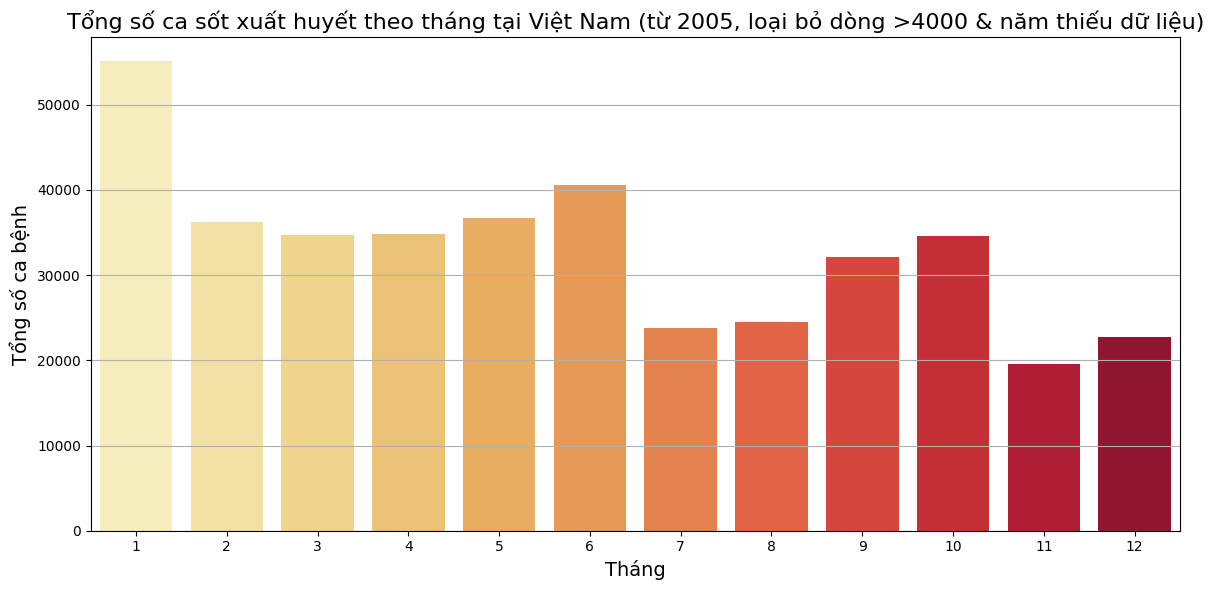

In [ ]:
# Bước 1: Lọc dữ liệu cho Việt Nam (không phân biệt chữ hoa thường)
vietnam_df = df[df['adm_0_name'].str.contains('viet', case=False, na=False)]

# Bước 2: Giữ lại dữ liệu từ năm 2005 trở đi
df_recent = vietnam_df[vietnam_df['Year'] >= 2005]

# Bước 3: Loại bỏ dòng có số ca bệnh > 4000
df_recent = df_recent[df_recent['dengue_total'] <= 4000]

# Bước 4: Đếm số dòng dữ liệu mỗi năm
year_counts = df_recent['Year'].value_counts()

# Bước 5: Chỉ giữ lại các năm có nhiều hơn 1 dòng
valid_years = year_counts[year_counts > 1].index
df_valid = df_recent[df_recent['Year'].isin(valid_years)]

# Bước 6: Nhóm theo tháng và tính tổng số ca bệnh
vietnam_monthly = df_valid.groupby("Month")["dengue_total"].sum().reset_index()

# Bước 7: Vẽ biểu đồ
plt.figure(figsize=(12,6))
sns.barplot(data=vietnam_monthly, x='Month', y='dengue_total', palette='YlOrRd')
plt.title('Tổng số ca sốt xuất huyết theo tháng tại Việt Nam (từ 2005)', fontsize=16)
plt.xlabel('Tháng', fontsize=14)
plt.ylabel('Tổng số ca bệnh', fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


1. Tháng có số ca bệnh cao nhất:
Tháng 1 có số ca bệnh cao nhất, khoảng trên 55.000 ca.

2. Giai đoạn thấp điểm:
Tháng 11 và 12 ghi nhận số ca thấp nhất, dao động dưới 30.000 ca, cho thấy đây là thời gian dịch suy giảm rõ rệt.

<ipython-input-40-e79a91697178>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=world_monthly, x='Month', y='dengue_total', palette='YlOrBr')


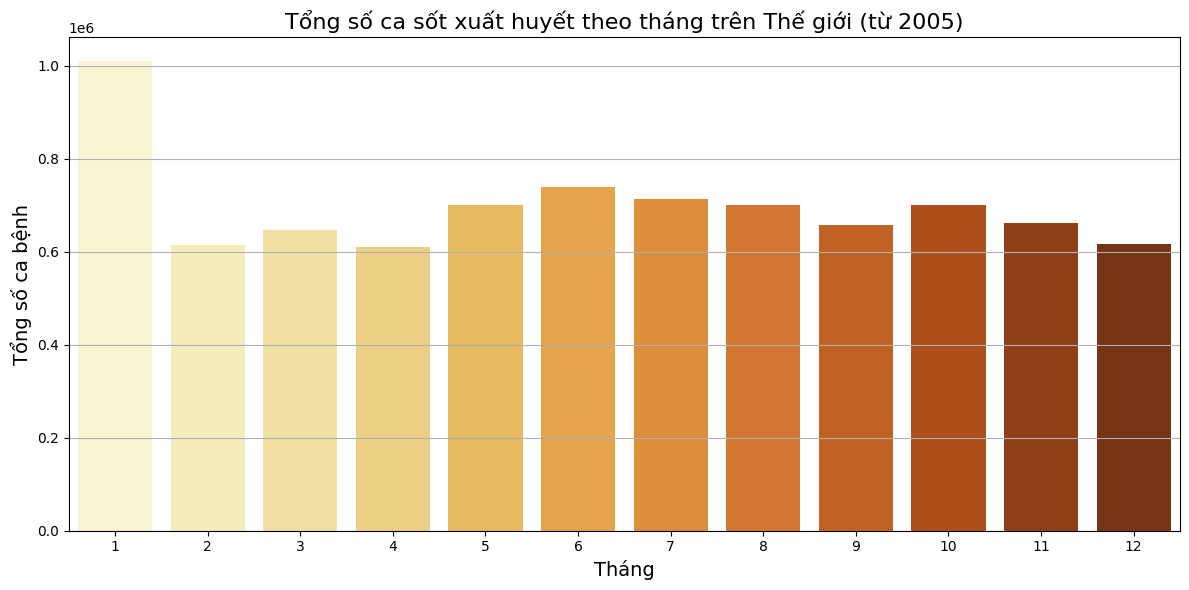

In [ ]:
# Bước 1: Giữ lại dữ liệu từ năm 2005 trở đi
df_recent = df[df['Year'] >= 2005]

# Bước 2: Loại bỏ các dòng có số ca bệnh > 4000
df_recent = df_recent[df_recent['dengue_total'] <= 4000]

# Bước 3: Đếm số dòng dữ liệu theo năm
year_counts = df_recent['Year'].value_counts()

# Bước 4: Giữ lại những năm có nhiều hơn 1 dòng
valid_years = year_counts[year_counts > 1].index
df_valid = df_recent[df_recent['Year'].isin(valid_years)]

# Bước 5: Nhóm dữ liệu theo tháng và tính tổng số ca bệnh
world_monthly = df_valid.groupby('Month')['dengue_total'].sum().reset_index()

# Bước 6: Vẽ biểu đồ
plt.figure(figsize=(12,6))
sns.barplot(data=world_monthly, x='Month', y='dengue_total', palette='YlOrBr')
plt.title('Tổng số ca sốt xuất huyết theo tháng trên Thế giới (từ 2005)', fontsize=16)
plt.xlabel('Tháng', fontsize=14)
plt.ylabel('Tổng số ca bệnh', fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Time‑Series Forecasting
Mục tiêu: dự báo số ca sốt xuất huyết tháng tiếp theo bằng ARIMA



In [ ]:
pip install statsmodels


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Chọn dữ liệu Việt Nam sau năm 2005 và loại bỏ ca > 4000
vietnam_df = df[(df['adm_0_name'] == 'VIET NAM') & (df['Year'] >= 2005)]
vietnam_df = vietnam_df[vietnam_df['dengue_total'] <= 4000]

# Chuyển 'calendar_end_date' thành datetime và sắp xếp
vietnam_df['date'] = pd.to_datetime(vietnam_df['calendar_end_date'])
vietnam_df = vietnam_df.sort_values('date')

# Gom nhóm theo tháng và lấy tổng số ca
monthly_cases = vietnam_df.groupby(pd.Grouper(key='date', freq='M'))['dengue_total'].sum()


<ipython-input-50-6eeca2913fad>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_cases = vietnam_df.groupby(pd.Grouper(key='date', freq='M'))['dengue_total'].sum()


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(monthly_cases)
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -1.3164630124022076
p-value: 0.6216072145823912


In [ ]:
n_test = 12
train_ts = monthly_cases.iloc[:-n_test]
test_ts  = monthly_cases.iloc[-n_test:]

In [ ]:
# Fit mô hình
model = ARIMA(monthly_cases, order=(1,1,1))  # Bạn có thể thử nghiệm các tham số khác nhau
model_fit = model.fit()

# Tóm tắt mô hình
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:           dengue_total   No. Observations:                  180
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1643.177
Date:                Wed, 07 May 2025   AIC                           3292.354
Time:                        23:17:29   BIC                           3301.916
Sample:                    01-31-2005   HQIC                          3296.231
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5193      0.065      8.025      0.000       0.392       0.646
ma.L1         -0.9131      0.035    -26.018      0.000      -0.982      -0.844
sigma2      5.489e+06   3.18e+05     17.241      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Access the predicted values from the forecast object
forecast_values = forecast.predicted_mean

mae  = mean_absolute_error(test_ts, forecast_values)
rmse = np.sqrt(mean_squared_error(test_ts, forecast_values))
mape = np.mean(np.abs((test_ts - forecast_values) / test_ts)) * 100

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE:  4408.42
RMSE: 4991.44
MAPE: nan%


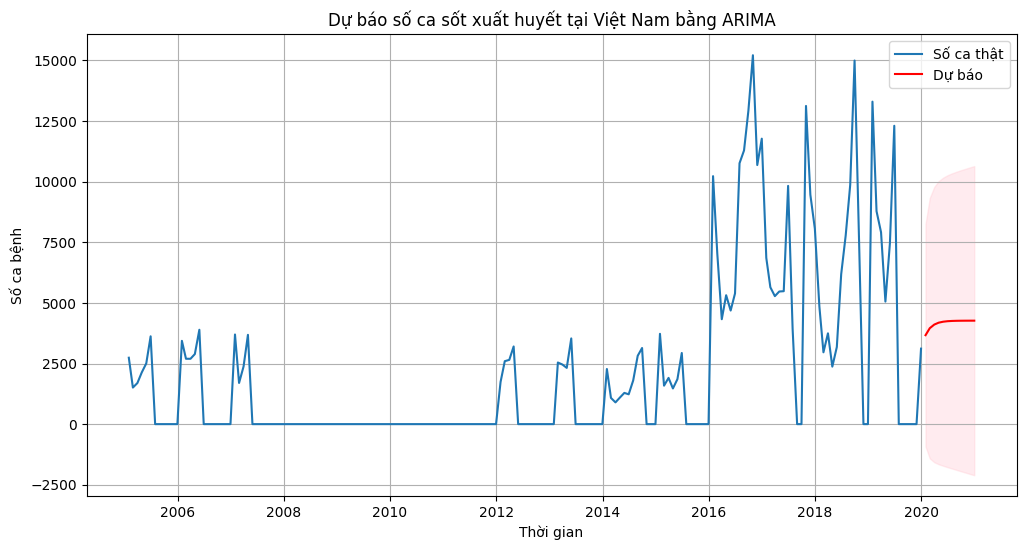

In [ ]:
# Dự báo 12 tháng tiếp theo
forecast = model_fit.get_forecast(steps=12)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Vẽ kết quả
plt.figure(figsize=(12,6))
plt.plot(monthly_cases, label='Số ca thật')
plt.plot(predicted_mean.index, predicted_mean, label='Dự báo', color='red')
plt.fill_between(predicted_mean.index, conf_int.iloc[:,0], conf_int.iloc[:,1], color='pink', alpha=0.3)
plt.title('Dự báo số ca sốt xuất huyết tại Việt Nam bằng ARIMA')
plt.xlabel('Thời gian')
plt.ylabel('Số ca bệnh')
plt.legend()
plt.grid()
plt.show()
